This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

In [3]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
import feature_engine.transformation as vt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
# Importing the dataset

wine_data = pd.read_csv("C:/Users/bebal/Downloads/IIITB-Data Science Program/Practice_Projects/winequality-red.csv", delimiter=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_data.shape

(1599, 12)

In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**The observations indicate that the dataset contains no missing values.**

In [10]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**The above output provides the minimum, maximum, standard deviation, and median values of the data.**

In [12]:
# Checking null values

wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 2. EDA

**In this step, we'll analyze several columns alongside 'Quality' to assess their performance.**

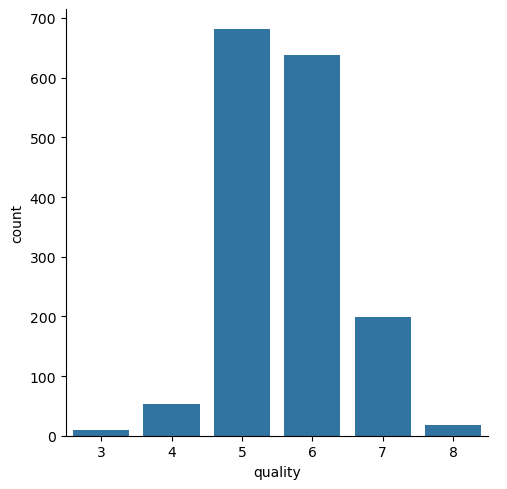

In [15]:
# Analyzing and Visualyzing for our target varibale which is 'quality'

sns.catplot(x='quality', data=wine_data, kind='count')
plt.show()

**The bar plot shows that 5 and 6 have the highest Quality, while the rest have lower Quality.**

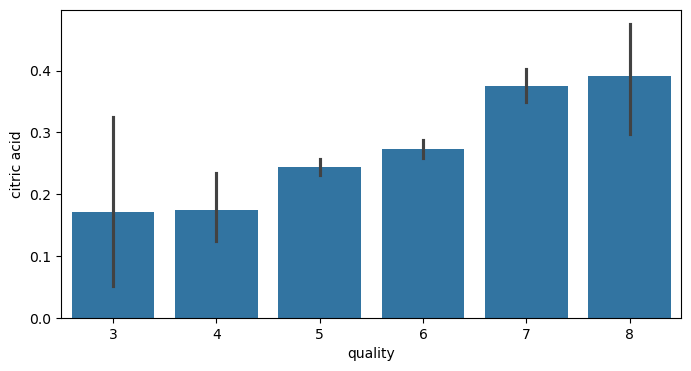

In [17]:
# Analyzing 'qaulity' varibale against citric acid

plt.figure(figsize=[8,4])
sns.barplot(x='quality', y='citric acid', data=wine_data)
plt.show()

**The Quality vs. Citric Acid graph shows that higher citric acid levels correspond to better wine quality.For ratings of 7 and 8, citric acid is higher, indicating better quality wine.**

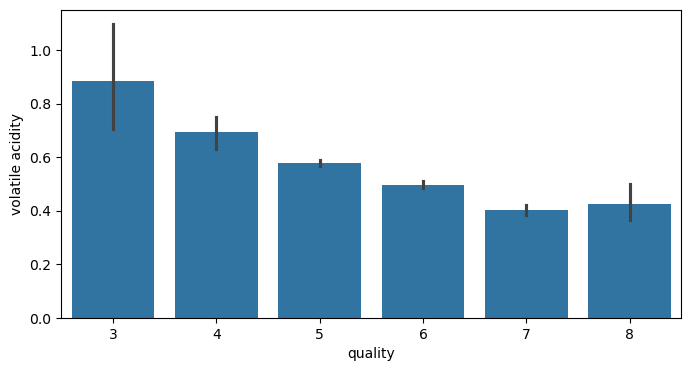

In [19]:
# Analyzing 'qaulity' varibale against volatile acidity

plt.figure(figsize=[8,4])
sns.barplot(x='quality', y='volatile acidity', data=wine_data)
plt.show()

**The Quality vs. Volatile Acidity graph indicates that lower volatile acidity is linked to better wine quality. Ratings of 7 and 8 have lower volatile acidity, reflecting higher quality wine.**

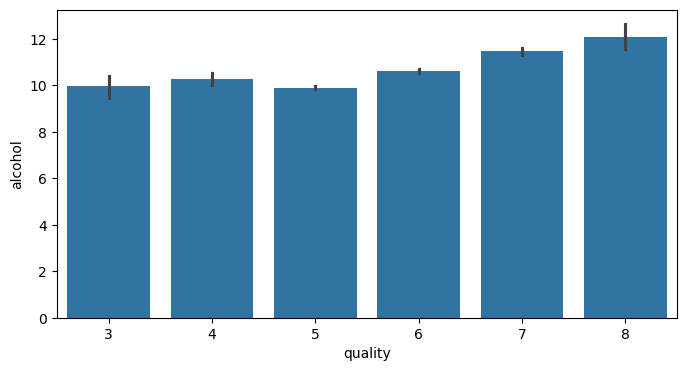

In [21]:
# Analyzing 'qaulity' varibale against alcohol

plt.figure(figsize=[8,4])
sns.barplot(x='quality', y='alcohol', data=wine_data)
plt.show()

**The Quality vs. Alcohol graph shows that higher alcohol levels are associated with better wine quality. Ratings of 7 and 8 have higher alcohol, indicating higher quality wine.**

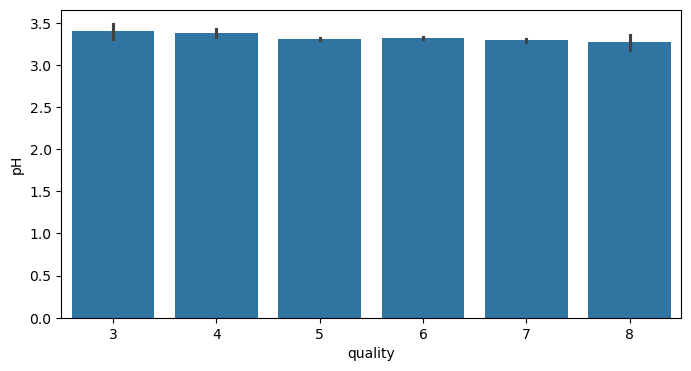

In [23]:
# Analyzing 'qaulity' varibale against ph

plt.figure(figsize=[8,4])
sns.barplot(x='quality', y='pH', data=wine_data)
plt.show()

**The Quality vs. pH graph suggests that higher pH values correlate with better quality, but the pH levels are generally similar, with 3 and 4 being slightly higher than the others.**

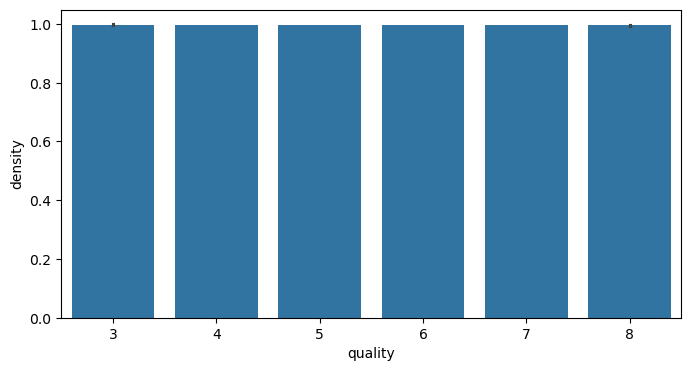

In [25]:
# Analyzing 'qaulity' varibale against density

plt.figure(figsize=[8,4])
sns.barplot(x='quality', y='density', data=wine_data)
plt.show()

**The Quality vs. Density graph shows no significant difference, as the wine quality has similar density across the board.**

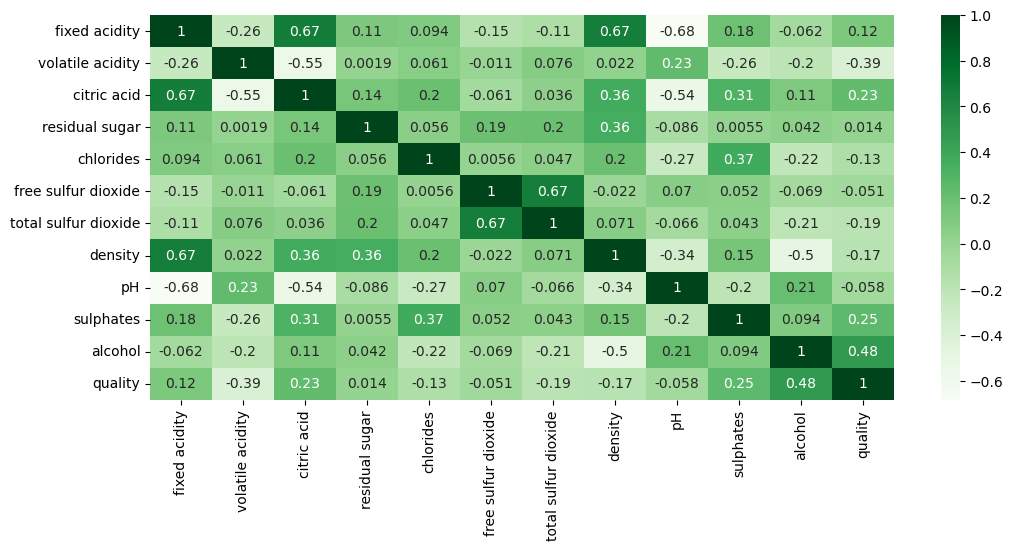

In [27]:
# Analyzing the correlation of the variables

plt.figure(figsize=(12,5))
sns.heatmap(wine_data.corr(), annot=True, cmap='Greens')
plt.show()

**The heatmap shows correlations between columns, with citric acid and density having a positive correlation, while pH vs. density and pH vs. quality display negative correlations.**

## Normal Distribution

**In this step, we converted the target column into binary values (0s and 1s) to prepare the labeled dataset for supervised learning.**

In [31]:
cols = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol']

In [32]:
lt = vt.LogTransformer(cols)

In [33]:
lt.fit(wine_data)

LogTransformer(variables=['fixed acidity', 'volatile acidity', 'residual sugar',
                          'chlorides', 'free sulfur dioxide',
                          'total sulfur dioxide', 'sulphates', 'alcohol'])

In [34]:
wine_data = lt.transform(wine_data)

In [35]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [36]:
encoder = LabelEncoder()

In [37]:
wine_data['quality'] = encoder.fit_transform(wine_data['quality'])

In [38]:
wine_data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [39]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,0
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,0
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,0
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,0
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,0


## Train and Test split

**In this step, we are splitting the dataset into training and testing sets to facilitate model building and enhance understanding of the model.**

In [42]:
X = wine_data.drop("quality", axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710


In [43]:
y = wine_data['quality']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## Feature Scaling

In [46]:
# Scaling the data

scaler = StandardScaler()

In [47]:
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [49]:
models = {
    'logm': LogisticRegression(random_state=42),
    'rfc': RandomForestClassifier(random_state=42),
    'dtc': DecisionTreeClassifier(random_state=42)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)        ## Train model

    # predict models
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test set performance
    #model_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Accuracy for trian set : ", model_train_accuracy)

    #print("Accuracy for test set : ", model_test_accuracy)

logm
Accuracy for trian set :  0.8954423592493298
rfc
Accuracy for trian set :  0.9991063449508489
dtc
Accuracy for trian set :  1.0


**We will use Random forest as it has the best accuracy**

## Hyper-parameter tuning for the Random Forest

In [52]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [53]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 25, 50]
}

In [54]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [55]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
CPU times: total: 344 ms
Wall time: 7.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [56]:
grid_search.best_score_

0.8963357654889912

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [58]:
pred = rf.predict(X_test)

In [59]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [60]:
print("Accuracy Score:",accuracy_score(pred,y_test))
print("classification Report:\n",classification_report(pred,y_test))

Accuracy Score: 0.8916666666666667
classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       425
           1       0.52      0.64      0.57        55

    accuracy                           0.89       480
   macro avg       0.74      0.78      0.76       480
weighted avg       0.90      0.89      0.90       480



**The model shows an accuracy of 89.16%, indicating strong performance.**

In [62]:
grid_search.best_score_

0.8963357654889912

In [63]:
rf_best.feature_importances_

array([0.05270463, 0.11404839, 0.09185004, 0.05818064, 0.0542133 ,
       0.04516949, 0.06590626, 0.13115209, 0.04651845, 0.15390544,
       0.18635127])

In [64]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [65]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [66]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
10,alcohol,0.186351
9,sulphates,0.153905
7,density,0.131152
1,volatile acidity,0.114048
2,citric acid,0.091850
6,total sulfur dioxide,0.065906
3,residual sugar,0.058181
4,chlorides,0.054213
0,fixed acidity,0.052705
8,pH,0.046518


## Summary

Accuracy: 89.16%

Best score: 89.63%

***Alcohol is identified as the top feature influencing wine quality, followed by density and sulfates.***